In [1]:
import numpy as np
import pandas as pd
from scipy.io import loadmat
from random import sample
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from scipy.optimize import fmin_cg

In [2]:
pd.set_option('max_rows', 7)
%matplotlib inline
#plt.rcParams['figure.figsize'] = 10, 10

In [3]:
data = loadmat('ex3data1.mat')
data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Oct 16 13:09:09 2011',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'y': array([[10],
        [10],
        [10],
        ...,
        [ 9],
        [ 9],
        [ 9]], dtype=uint8)}

In [4]:
X = data['X']
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [5]:
y = data['y']
y

array([[10],
       [10],
       [10],
       ...,
       [ 9],
       [ 9],
       [ 9]], dtype=uint8)

In [6]:
#generate 100 random indexes
random_indexes = sample(range(5000), 100)
X[random_indexes[0]]

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  

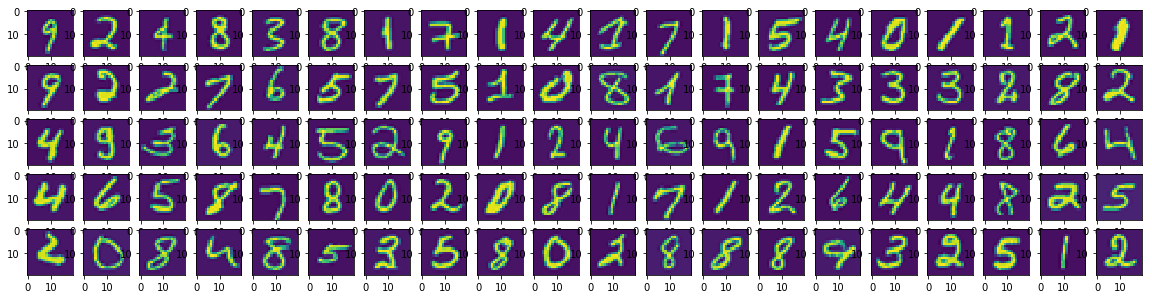

In [7]:
#draw 100 random images from grayscale pixels
IMG_COUNT = len(random_indexes)
IMG_SIZE = 20
    
fig = plt.figure(figsize=(20, 20))
for i in range(1, IMG_COUNT + 1):
    image = np.reshape(X[random_indexes[i - 1]], (IMG_SIZE, IMG_SIZE), order='F')
    fig.add_subplot(IMG_SIZE, IMG_SIZE, i)
    #plt.imshow(image, cmap=cm.gray)
    plt.imshow(image)

plt.show()

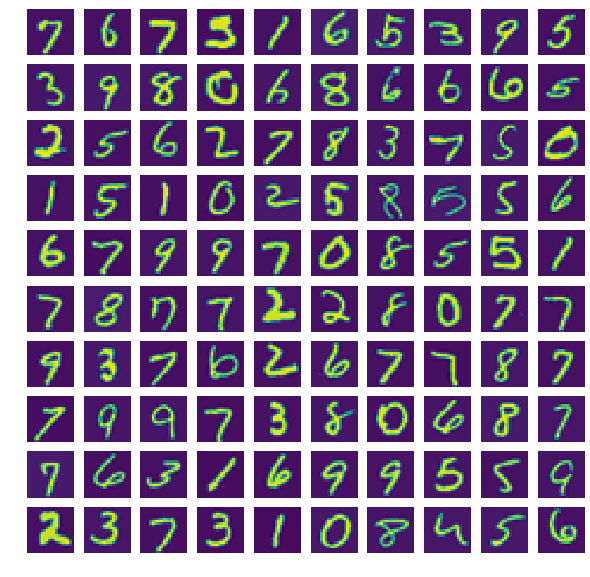

In [8]:
#draw it in a 10x10 matrix
FIG_SIZE = 10
_, axarr = plt.subplots(FIG_SIZE, FIG_SIZE, figsize=(FIG_SIZE, FIG_SIZE))
axarr
for i in range(FIG_SIZE):
    for j in range(FIG_SIZE):
        axarr[i, j].imshow(X[np.random.randint(X.shape[0])].\
                           reshape((IMG_SIZE, IMG_SIZE), order='F'))
        axarr[i, j].axis('off')

In [9]:
m = len(y)
n = data['X'].shape[1]
ones = np.ones((m, 1))
theta = np.zeros((n+1, 1))
lmbda = 1
n

400

In [10]:
X = np.hstack((ones, X))
X

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [11]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [12]:
def costFunction(theta, X, y, m, lmbda):
    J = (-1/m) * (y.T @ np.log(sigmoid(X @ theta)) +
                 (1 - y.T) @ np.log(1 - sigmoid(X @ theta))) 
    regularization = (lmbda/(2*m)) * (theta[1:].T @ theta[1:])
        
    return J + regularization

#other implementation using np.multiply and np.dot instead of Python's @
def costFunctionReg(theta, X, y, m, lmbda):
    m = len(y)
    temp1 = np.multiply(y, np.log(sigmoid(np.dot(X, theta))))
    temp2 = np.multiply(1-y, np.log(1-sigmoid(np.dot(X, theta))))
    return np.sum(temp1 + temp2) / (-m) + np.sum(theta[1:]**2) * lmbda / (2*m)

In [13]:
J = costFunction(theta, X, y, m, lmbda)[0][0]
J

160.39425758157174

In [15]:
J2 = costFunctionReg(theta, X, y, m, lmbda)
J2

160.39425758157134

In [16]:
J == J2

False

In [17]:
#implementation from ex2 - no correct!
def gradient(theta, X, y, m, lmbda):
    grad = np.zeros([m, 1])
    grad = (1/m) * X.T @ (sigmoid(X @ theta) - y)
    grad [1:] = grad[1:] + (lmbda / m) * theta[1:]
    return grad


def gradRegularization(theta, X, y, m, lmbda):
    temp = sigmoid(np.dot(X, theta)) - y
    temp = np.dot(temp.T, X).T / m + theta * lmbda / m
    temp[0] = temp[0] - theta[0] * lmbda / m
    return temp

In [21]:
g = gradient(theta, X, y, m, lmbda)
g

array([[-5.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [-7.74530186e-08],
       [ 3.19876600e-06],
       [ 1.89536237e-05],
       [-7.06376094e-04],
       [-8.97395355e-04],
       [-3.72741263e-04],
       [-1.10787541e-04],
       [-1.37049401e-04],
       [-4.11905416e-05],
       [ 3.09307938e-05],
       [ 7.56273049e-05],
       [ 1.66101324e-04],
       [ 1.88959823e-04],
       [ 1.11618541e-04],
       [ 3.44740605e-05],
       [ 2.31849497e-07],
       [-3.65944989e-07],
       [ 0.00000000e+00],
       [-2.71480120e-07],
       [ 2.68348312e-06],
       [ 1.35802658e-06],
       [ 5.10971729e-05],
       [ 9.29459372e-05],
       [-1.13518367e-03],
       [-4.04630781e-03],
       [-5.65616107e-03],
       [-4.38249876e-03],
       [-1.22936584e-03],
       [ 1.06402725e-03],
       [ 1.67724463e-03],
       [ 1.83122226e-03],
       [ 1.41359436e-03],
       [ 1.00669534e-03],
       [ 6.22600175e-04],
       [ 2.88468971e-04],
       [ 1.6

In [22]:
g2 = gradRegularization(theta, X, y, m, lmbda)
g2

array([[-5.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [-7.74530186e-08],
       [ 3.19876600e-06],
       [ 1.89536237e-05],
       [-7.06376094e-04],
       [-8.97395355e-04],
       [-3.72741263e-04],
       [-1.10787541e-04],
       [-1.37049401e-04],
       [-4.11905416e-05],
       [ 3.09307938e-05],
       [ 7.56273049e-05],
       [ 1.66101324e-04],
       [ 1.88959823e-04],
       [ 1.11618541e-04],
       [ 3.44740605e-05],
       [ 2.31849497e-07],
       [-3.65944989e-07],
       [ 0.00000000e+00],
       [-2.71480120e-07],
       [ 2.68348312e-06],
       [ 1.35802658e-06],
       [ 5.10971729e-05],
       [ 9.29459372e-05],
       [-1.13518367e-03],
       [-4.04630781e-03],
       [-5.65616107e-03],
       [-4.38249876e-03],
       [-1.22936584e-03],
       [ 1.06402725e-03],
       [ 1.67724463e-03],
       [ 1.83122226e-03],
       [ 1.41359436e-03],
       [ 1.00669534e-03],
       [ 6.22600175e-04],
       [ 2.88468971e-04],
       [ 1.6

In [23]:
g == g2

array([[False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [

In [50]:
#Optimizing Parameters
k = 10 #classifier count
lmbda2 = 0.1
theta_optimized = np.zeros((k, n+1))
for i in range(k):
    digit_class = i if i else 10
    theta_optimized[i] = fmin_cg(f = costFunctionReg, 
                       x0 = theta_optimized[i],
                       fprime = gradRegularization,
                       args=(X, (y == digit_class).flatten(), m, lmbda2), 
                       maxiter = 50)

         Current function value: 0.009110
         Iterations: 50
         Function evaluations: 182
         Gradient evaluations: 182
         Current function value: 0.014469
         Iterations: 50
         Function evaluations: 178
         Gradient evaluations: 178
         Current function value: 0.056449
         Iterations: 50
         Function evaluations: 142
         Gradient evaluations: 142
         Current function value: 0.061955
         Iterations: 50
         Function evaluations: 139
         Gradient evaluations: 139
         Current function value: 0.037407
         Iterations: 50
         Function evaluations: 154
         Gradient evaluations: 154
         Current function value: 0.063615
         Iterations: 50
         Function evaluations: 131
         Gradient evaluations: 131
         Current function value: 0.020035
         Iterations: 50
         Function evaluations: 175
         Gradient evaluations: 175
         Current function value: 0.033525
      

In [25]:
theta_optimized

array([[-8.92892709e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -3.74848355e-04,  2.12773641e-05,  0.00000000e+00],
       [-3.12456980e+00,  0.00000000e+00,  0.00000000e+00, ...,
         3.51998922e-03,  1.85993197e-07,  0.00000000e+00],
       [-3.11129753e+00,  0.00000000e+00,  0.00000000e+00, ...,
         4.87470570e-03, -5.57247755e-04,  0.00000000e+00],
       ...,
       [-2.06800538e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -9.06909676e-04,  1.12296493e-04,  0.00000000e+00],
       [-8.92141091e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -1.21162291e-04,  1.16366163e-05,  0.00000000e+00],
       [-4.77585964e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -1.12679589e-03,  8.70544149e-05,  0.00000000e+00]])

In [26]:
#accuracy
pred = np.argmax(X @ theta_optimized.T, axis=1)
pred = [e if e else 10 for e in pred]
np.mean(pred == y.flatten()) * 100

95.12

Prediction: 1


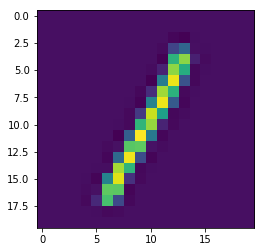

In [74]:
#test the prediction
def predictRandomDigit():
    random_digit = X[np.random.randint(X.shape[0])]
    #remove intercept term for reshape to work
    plt.imshow(random_digit[1:].reshape((IMG_SIZE, IMG_SIZE), order='F'))
    predicted = np.argmax(sigmoid(np.dot(random_digit, theta_optimized.T)))
    print(f"Prediction: {predicted}")

    
predictRandomDigit()

In [66]:
a = [1, 2, 3]
a[1:]


[2, 3]